In [2]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [20]:
# read data from csv
df=pd.read_csv('KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [9]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [30]:
#Dummy Enconding Object Variables
X=pd.get_dummies(df, columns=['age', 'gender'])

In [31]:
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   interest             1143 non-null   int64  
 4   Impressions          1143 non-null   int64  
 5   Clicks               1143 non-null   int64  
 6   Spent                1143 non-null   float64
 7   Total_Conversion     1143 non-null   int64  
 8   Approved_Conversion  1143 non-null   int64  
 9   age_30-34            1143 non-null   uint8  
 10  age_35-39            1143 non-null   uint8  
 11  age_40-44            1143 non-null   uint8  
 12  age_45-49            1143 non-null   uint8  
 13  gender_F             1143 non-null   uint8  
 14  gender_M             1143 non-null   uint8  
dtypes: float64(1), int64(8), uint8(6)
memo

In [35]:
corr=X.corr()

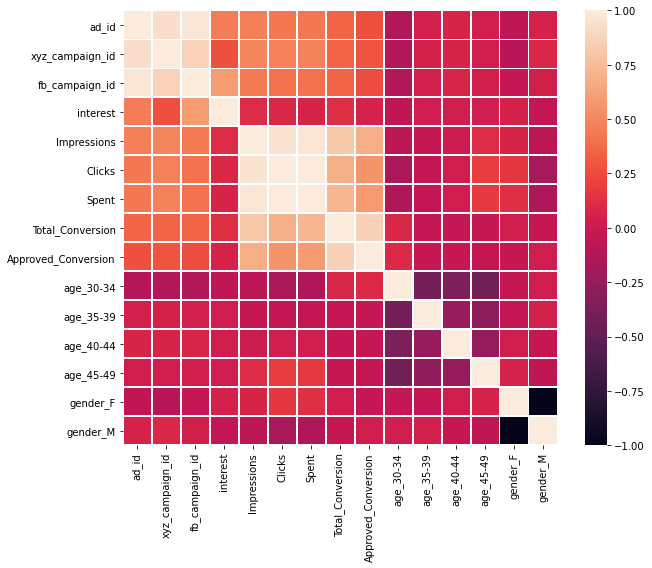

In [41]:
plt.figure(figsize=(10,8))
ax=sns.heatmap(corr,square=True,linewidths=.8)

In [42]:
X.drop(X.columns[[0,1,2,3]],axis=1,inplace =True)

In [43]:
X.columns

Index(['Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'age_30-34', 'age_35-39', 'age_40-44',
       'age_45-49', 'gender_F', 'gender_M'],
      dtype='object')

In [48]:
#Using Elbow Method to determine Range of Clusters
from sklearn.cluster import KMeans
custAd = []
for i in range(2, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    custAd.append(km.inertia_)

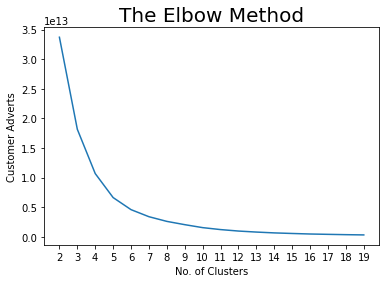

In [52]:
plt.plot(range(2, 20), custAd)
plt.title('The Elbow Method', fontsize = 20)
plt.xticks(range(2, 20))
plt.Figure(figsize=(12,10))
plt.xlabel('No. of Clusters')
plt.ylabel('Customer Adverts')
plt.show()

In [60]:
#Clusters from above are 5 in number
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

In [63]:
km.cluster_centers_

array([[3.09154602e+04, 5.53183024e+00, 8.30858091e+00, 1.27984085e+00,
        4.54907162e-01, 4.08488064e-01, 2.24137931e-01, 1.68435013e-01,
        1.98938992e-01, 4.68169761e-01, 5.31830239e-01],
       [1.05593859e+06, 1.94841270e+02, 2.99217936e+02, 1.24126984e+01,
        3.92063492e+00, 2.69841270e-01, 2.06349206e-01, 1.74603175e-01,
        3.49206349e-01, 6.19047619e-01, 3.80952381e-01],
       [5.73265480e+05, 1.05830000e+02, 1.61038800e+02, 6.53000000e+00,
        1.98000000e+00, 3.00000000e-01, 1.80000000e-01, 1.70000000e-01,
        3.50000000e-01, 6.30000000e-01, 3.70000000e-01],
       [2.16847700e+06, 3.02666667e+02, 5.00788334e+02, 3.23333333e+01,
        1.23333333e+01, 6.66666667e-01, 0.00000000e+00, 1.66666667e-01,
        1.66666667e-01, 3.33333333e-01, 6.66666667e-01],
       [2.42104682e+05, 4.23636364e+01, 6.58237273e+01, 3.04545455e+00,
        9.86363636e-01, 3.04545455e-01, 2.18181818e-01, 2.45454545e-01,
        2.31818182e-01, 4.27272727e-01, 5.72727273e-

In [62]:
km.labels_

array([0, 0, 0, ..., 4, 2, 2])

In [61]:
y_means

array([0, 0, 0, ..., 4, 2, 2])

In [68]:
y_means is km.labels_

True

In [64]:
df['‘Advert_Type'] = y_means

In [66]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,‘Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,2
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,4
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,2


In [ ]:
dAdvert=df[]